/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:43:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x600 with 0 Axes>

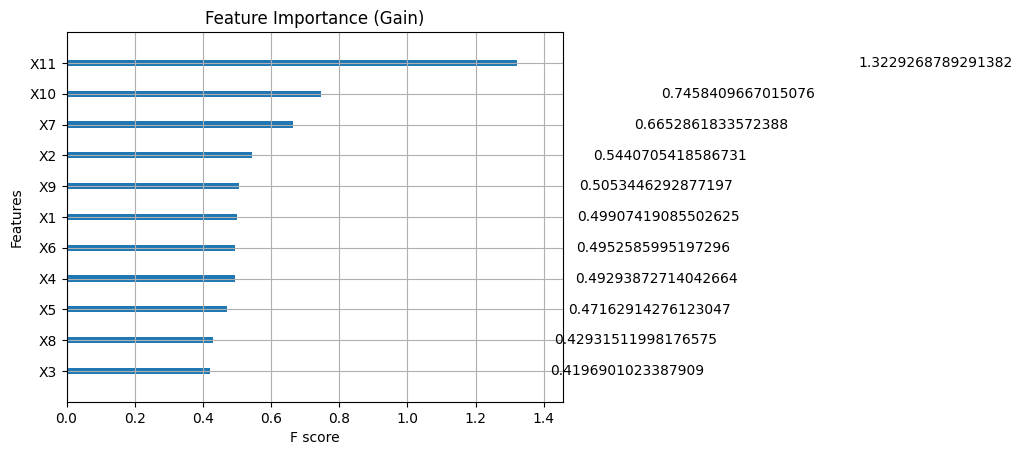

Feature Importance: Menampilkan kontribusi masing-masing fitur terhadap prediksi.


In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from xgboost import XGBClassifier, plot_importance, plot_tree
from sklearn.metrics import accuracy_score
import shap
from sklearn.inspection import PartialDependenceDisplay

# Step 1: Load dataset
file_path = 'tugasxgboost.csv'
data = pd.read_csv(file_path)

# Step 2: Basic preprocessing
# Assuming the last column is the target
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Convert target to numeric and normalize class labels to start from 0
if y.dtypes == 'object' or y.dtypes.name == 'category':
    y = y.astype('category').cat.codes
else:
    y = y - y.min()  # Normalize target to start from 0

# Convert categorical features to numeric (if any)
X = pd.get_dummies(X, drop_first=True)

# Handle missing values by filling them with the mean
X = X.fillna(X.mean())

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train an XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Step 4: Feature Importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='gain', title="Feature Importance (Gain)")
plt.show()
print('Feature Importance: Menampilkan kontribusi masing-masing fitur terhadap prediksi.')

<Figure size 2000x1000 with 0 Axes>

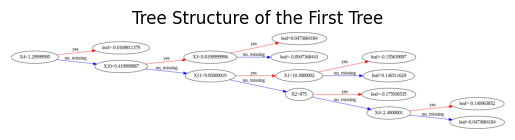

In [20]:
# Step 5: Visualize Tree Structure
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=0, rankdir="LR")
plt.title("Tree Structure of the First Tree")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
13 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 

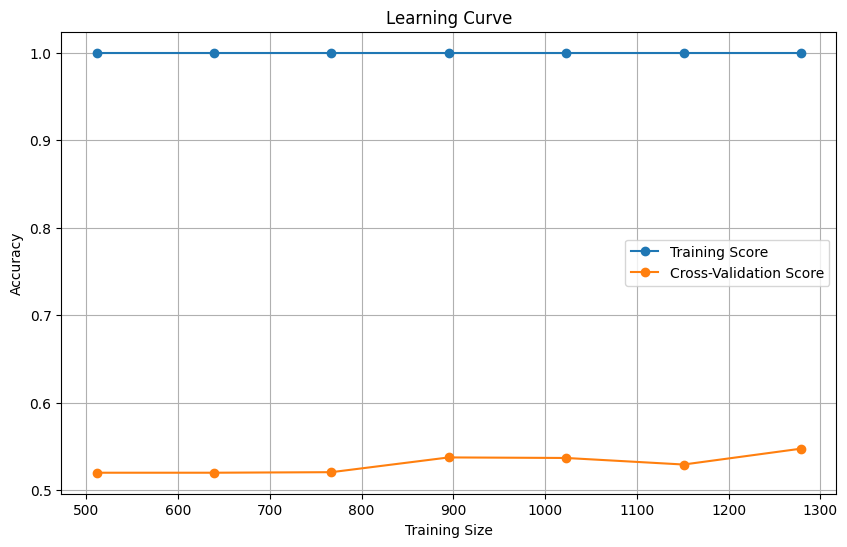

In [21]:
# Step 6: Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', label="Cross-Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

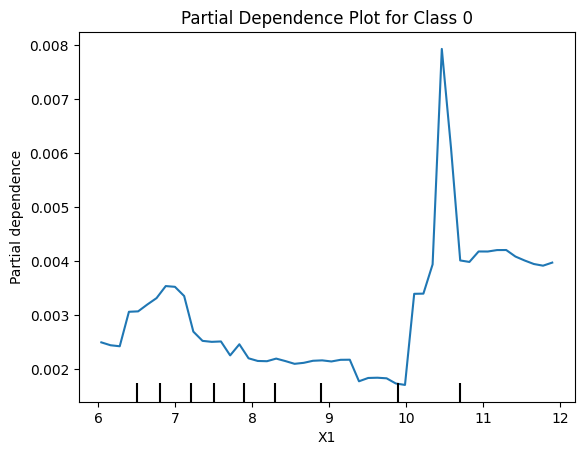

In [23]:
# Step 8: Partial Dependence Plot
features = [0]  # Index of feature(s) to analyze
target_class = 0  # Specify the target class for multi-class problems

PartialDependenceDisplay.from_estimator(
    model, X_test, features, grid_resolution=50, target=target_class
)
plt.title(f"Partial Dependence Plot for Class {target_class}")
plt.show()


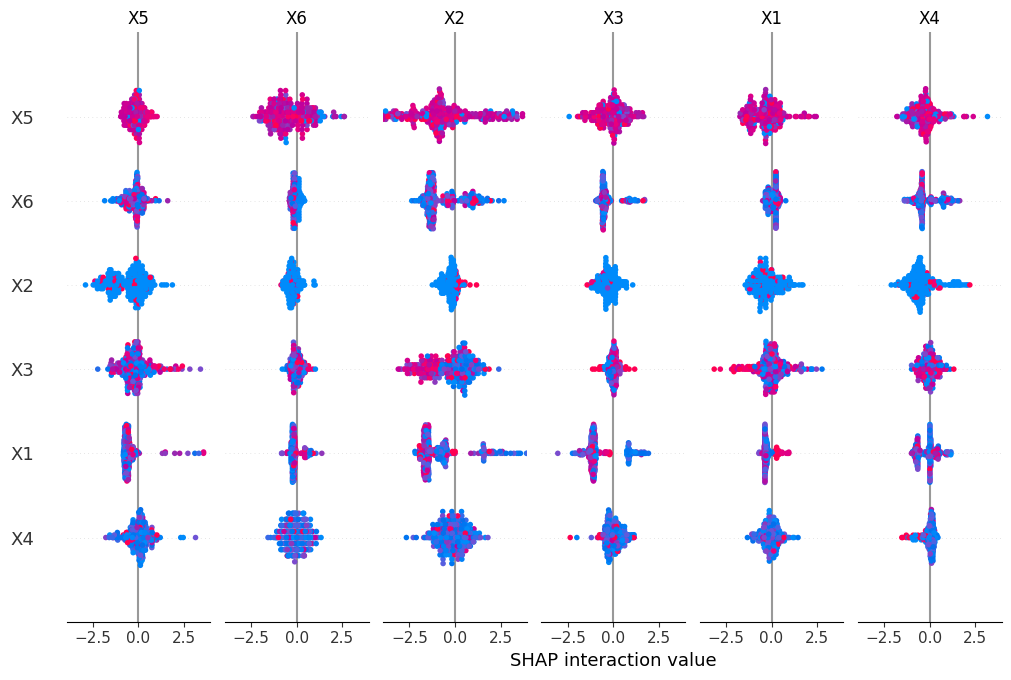

SHAP Values: Interpretasi global dan lokal dari prediksi model.


In [24]:
# Step 7: SHAP Values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)
print('SHAP Values: Interpretasi global dan lokal dari prediksi model.')